In [1]:
# tf 2

import sys,os

# make tf quiet
    # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

# data
import numpy as np
import pandas as pd

# tf
import tensorflow as tf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.model_selection import train_test_split # train test split
from sklearn.preprocessing import MinMaxScaler # scale 0 - 1
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# metrics
from sklearn import metrics #accuracy measure

# misc
from IPython.display import Image, display
import datetime
import math

# to show images
def show_image(fn, width=500):
    fp1 = os.path.join('./diagrams/', fn)
    display(Image(filename=fp1, width=width))


In [2]:
# versions
print(f"np: {np.__version__}")
print(f"pd: {pd.__version__}")
print(f"sns: {sns.__version__}")
print(f"tf: {tf.__version__}")
print(f"py: {sys.version_info[0:3]}") # sys.version

np: 1.17.3
pd: 0.25.2
sns: 0.9.0
tf: 2.0.0
py: (3, 7, 3)


In [ ]:
# tf2 basics (low-level)

# constant
tensor = tf.constant([[23,4], [32, 51]])
tensor.shape # shape
tensor.numpy() # return tensor as numpy array (doesn't need tf session)

# numpy --> tensor
A = np.array([[23,4], [32, 51]])
tensor = tf.constant(A)

# variables
tensor = tf.Variable([[23,4], [32, 51]])
tensor.shape # shape
tensor.numpy() # return tensor as numpy array
tensor[0,1].assign(10) # change a value

# math operations
tensor = tf.constant([[1,2], [3, 4]])
tensor + 2 # element-wise addition
tensor * 5 # element-wise scalar multiplication
np.square(tensor) # element-wise squares
np.sqrt(tensor) # element-wise sqrt
tensor * tensor # hadamard multiplication
tensor @ tensor # standard matrix multiplication
tensor @ tf.transpose(tensor) # A @ At
tf.transpose(tensor) @ tensor # At @ A
np.round(tf.constant(np.random.randn(2,2))) # round elements
np.abs(tf.constant(np.random.randn(2,2))) # abs elements
np.trace(tf.transpose(tensor) @ tensor) # frobenius product

# strings
const_string = tf.constant('tf') # string constant
tf.strings.length(const_string) # length
const_array = tf.constant(['np', 'pd', 'tf'])
for string in const_array:
    print(string)
    

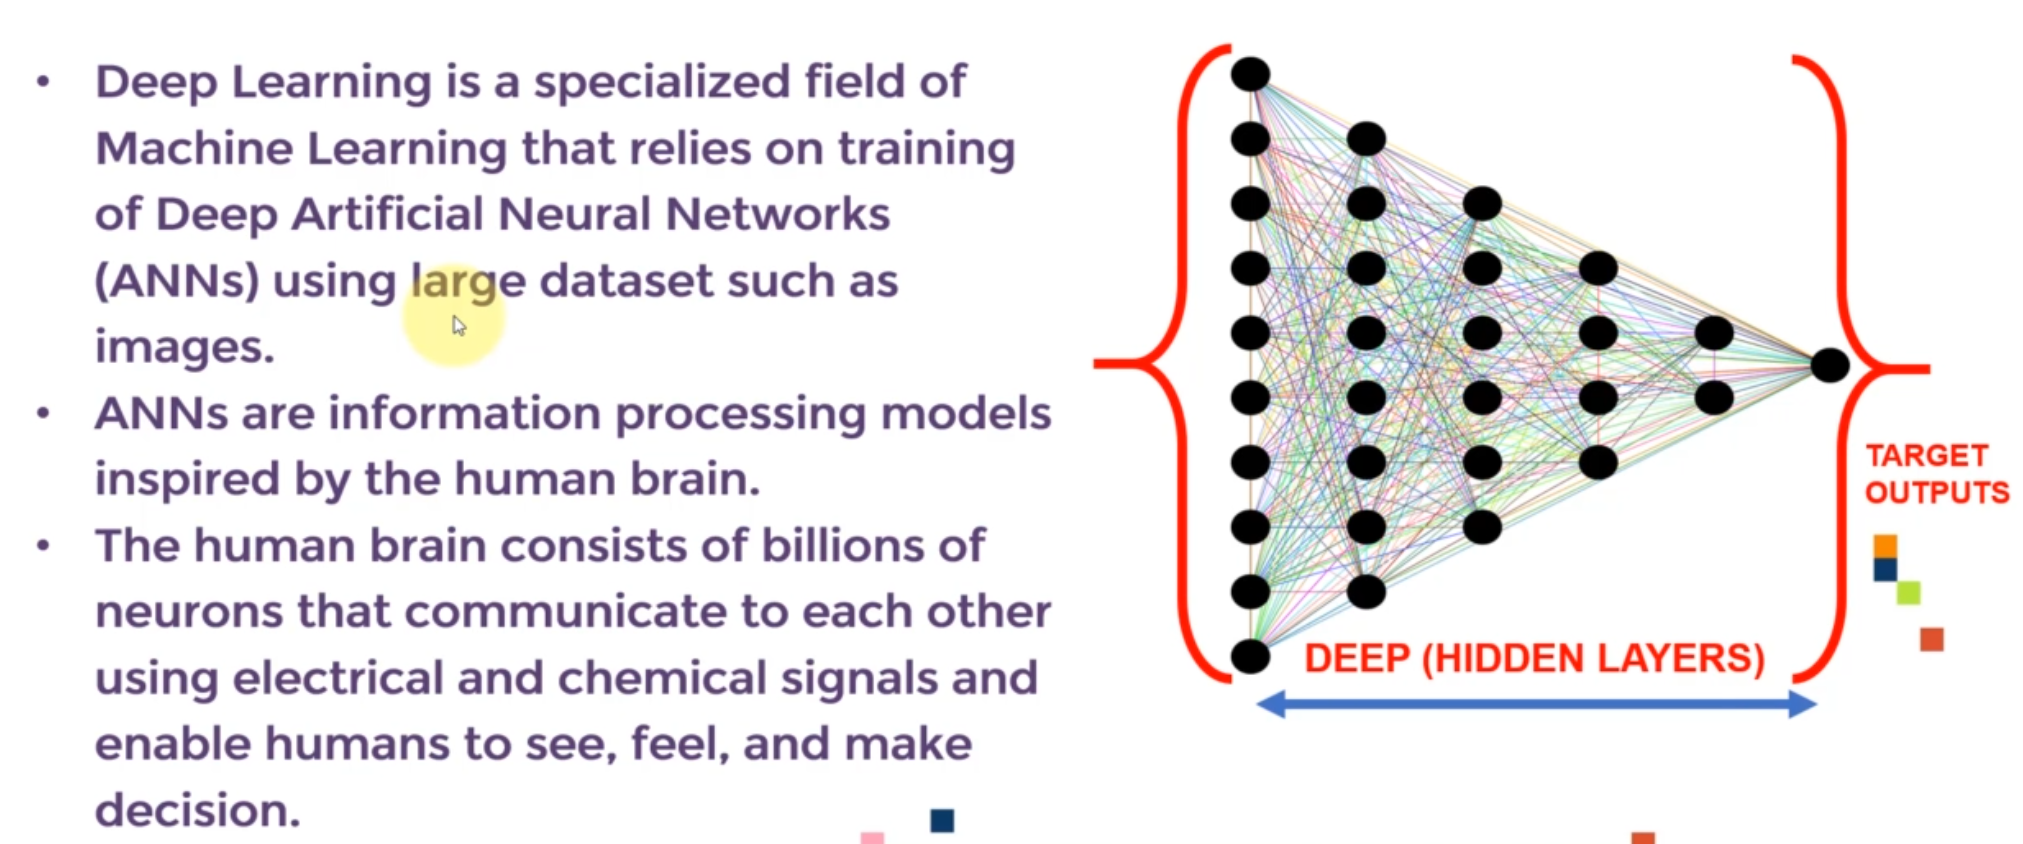

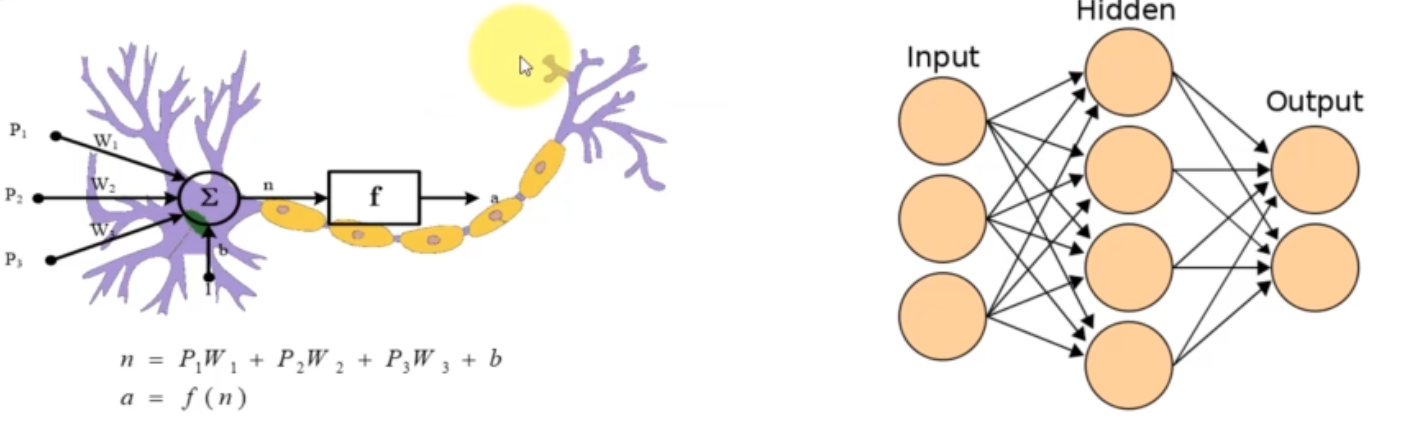

In [54]:
# deep learning
show_image(fn='deep-learning.png')
show_image(fn='nn.png')

In [ ]:
# save/load models
    # https://www.tensorflow.org/guide/keras/save_and_serialize
    # https://www.tensorflow.org/tutorials/keras/save_and_load

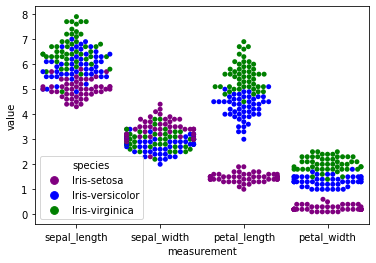

In [3]:
# df visualization (iris)

df = pd.read_csv('./data/iris.data', header=None)
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# plt histogram
# plt.hist(df['sepal_length'])

# pandas histograms
# df.hist(edgecolor='white', linewidth=1.2, figsize=(12,8))

# pandas boxplots
# df.boxplot(by='species', figsize=(12,8))

# pandas pairplot 
# pd.plotting.scatter_matrix(df, figsize=(12,10))

# sns distplot (histogram)
# sns.distplot(df['sepal_length'])

# sns kde (probability curve)
# sns.kdeplot(df['sepal_length'], shade=True)

# sns scatterplot (bivariate)
# sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'], style=df['species'])

# sns jointplot (bivariate)
# sns.jointplot(x=df['sepal_length'], y=df['sepal_width'])

# sns jointplot (bivariate) (hex)
# sns.jointplot(x=df['sepal_length'], y=df['sepal_width'], kind="hex")

# sns jointplot (bivariate) (kde)
# sns.jointplot(x=df['sepal_length'], y=df['sepal_width'], kind='kde')

# sns kde plot (bivariate) 
# sns.kdeplot(data=df['sepal_length'], data2=df['sepal_width'])

# sns kde plot (bivariate) (dark)
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(data=df['sepal_length'], data2=df['sepal_width'], cmap=cmap, n_levels=60, shade=True)

# sns violin plot
# plt.figure(figsize=(12,8));
# plt.subplot(2,2,1)
# sns.violinplot(x='species', y='sepal_length', data=df)
# plt.subplot(2,2,2)
# sns.violinplot(x='species', y='sepal_width', data=df)
# plt.subplot(2,2,3)
# sns.violinplot(x='species', y='petal_length', data=df)
# plt.subplot(2,2,4)
# sns.violinplot(x='species', y='petal_width', data=df)

# sns boxplot
# sns.boxplot(x=df['species'], y=df['sepal_width'])

# sns melted swarmplot
data = pd.melt(df, 'species', var_name='measurement')
sns.swarmplot(x='measurement', y='value', hue='species', palette=['purple','blue','green'], data=data)

# sns pairplot (compare all columns against each other)
# sns.pairplot(df, hue='species', height=3, aspect=1)


# NOT APPLICABLE HERE
# sns line plot 
# sns.lineplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'], style=df['species'])

# NOT APPLICABLE HERE
# sns catplot (NOT APPLICABLE HERE)
# sns.catplot(x=df['species'], y=df['sepal_width'], hue=df['species'], kind='bar', palette='muted')


In [ ]:
# estimator
    #
# model_to_estimator
    # https://www.tensorflow.org/api_docs/python/tf/keras/estimator/model_to_estimator
# feature_column
    # https://www.tensorflow.org/api_docs/python/tf/feature_column

In [16]:
# estimator api (DNNClassifier) (pt1)

# input function (train)
def input_fn_train(features, labels, batch_size=256):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    # Shuffle and repeat if you are in training mode.
    dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)
# input function (evaluate)
def input_fn_evaluate(features, labels, batch_size=256):
    """An input function for evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    return dataset.batch(batch_size)
# input function (predict)
def input_fn_predict(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


# data (iris)
df = pd.read_csv('./data/iris.data', header=None)
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = df.replace({
    'species': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})
# split
y = df['species']
X = df.drop('species', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
# model
feature_columns = [tf.feature_column.numeric_column(key=x) for x in X_train.keys()]
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns, # feature columns
    hidden_units=[30,10], # two hidden layers of 10 nodes each
    n_classes=3
)
# train
classifier.train(
    input_fn=lambda: input_fn_train(X_train, y_train),
    steps=25000
)
# evaluate (on training data)
result = classifier.evaluate(
    input_fn=lambda: input_fn_evaluate(X_train, y_train,)
)
print(result)
# predict
predictions = list(classifier.predict(input_fn=lambda: input_fn_predict(X_test)))
print(predictions[0].keys())
y_pred = [ x['classes'].astype(int)[0] for x in predictions ]
# score
print(metrics.classification_report(y_test, y_pred))
print(f"accuracy: {metrics.accuracy_score(y_test, y_pred)}")

# view element-wise comparison
# for p, t in zip(predictions, y_test):
    # species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    # class_id = p['class_ids'][0]
    # probability = np.round(float(p['probabilities'][class_id]), 3)
    # print(f"prediction: {species[class_id]}", f"probability: {probability}", f"expected: {species[t]}", '', sep='\n')
    

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmps4xph86b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe4bc103320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to ru

INFO:tensorflow:global_step/sec: 182.576
INFO:tensorflow:loss = 0.8876182, step = 6300 (0.548 sec)
INFO:tensorflow:global_step/sec: 180.075
INFO:tensorflow:loss = 0.88341355, step = 6400 (0.556 sec)
INFO:tensorflow:global_step/sec: 182.693
INFO:tensorflow:loss = 0.8744017, step = 6500 (0.547 sec)
INFO:tensorflow:global_step/sec: 189.881
INFO:tensorflow:loss = 0.8577898, step = 6600 (0.527 sec)
INFO:tensorflow:global_step/sec: 181.645
INFO:tensorflow:loss = 0.8687198, step = 6700 (0.550 sec)
INFO:tensorflow:global_step/sec: 191.434
INFO:tensorflow:loss = 0.85870963, step = 6800 (0.522 sec)
INFO:tensorflow:global_step/sec: 186.732
INFO:tensorflow:loss = 0.85248566, step = 6900 (0.536 sec)
INFO:tensorflow:global_step/sec: 178.758
INFO:tensorflow:loss = 0.83932185, step = 7000 (0.559 sec)
INFO:tensorflow:global_step/sec: 193.127
INFO:tensorflow:loss = 0.8410221, step = 7100 (0.518 sec)
INFO:tensorflow:global_step/sec: 183.721
INFO:tensorflow:loss = 0.8273734, step = 7200 (0.545 sec)
INFO:t

INFO:tensorflow:loss = 0.4407345, step = 14500 (0.559 sec)
INFO:tensorflow:global_step/sec: 184.628
INFO:tensorflow:loss = 0.4340536, step = 14600 (0.541 sec)
INFO:tensorflow:global_step/sec: 184.487
INFO:tensorflow:loss = 0.4317402, step = 14700 (0.544 sec)
INFO:tensorflow:global_step/sec: 171.834
INFO:tensorflow:loss = 0.42303833, step = 14800 (0.581 sec)
INFO:tensorflow:global_step/sec: 153.779
INFO:tensorflow:loss = 0.43268484, step = 14900 (0.652 sec)
INFO:tensorflow:global_step/sec: 112.719
INFO:tensorflow:loss = 0.4173389, step = 15000 (0.886 sec)
INFO:tensorflow:global_step/sec: 135.473
INFO:tensorflow:loss = 0.4194913, step = 15100 (0.739 sec)
INFO:tensorflow:global_step/sec: 140.141
INFO:tensorflow:loss = 0.4130904, step = 15200 (0.710 sec)
INFO:tensorflow:global_step/sec: 131.192
INFO:tensorflow:loss = 0.4162552, step = 15300 (0.771 sec)
INFO:tensorflow:global_step/sec: 91.5044
INFO:tensorflow:loss = 0.410961, step = 15400 (1.085 sec)
INFO:tensorflow:global_step/sec: 112.541

INFO:tensorflow:global_step/sec: 177.328
INFO:tensorflow:loss = 0.28557232, step = 22700 (0.564 sec)
INFO:tensorflow:global_step/sec: 183.387
INFO:tensorflow:loss = 0.28803134, step = 22800 (0.545 sec)
INFO:tensorflow:global_step/sec: 181.948
INFO:tensorflow:loss = 0.28870773, step = 22900 (0.550 sec)
INFO:tensorflow:global_step/sec: 175.139
INFO:tensorflow:loss = 0.27425683, step = 23000 (0.572 sec)
INFO:tensorflow:global_step/sec: 178.786
INFO:tensorflow:loss = 0.28508562, step = 23100 (0.558 sec)
INFO:tensorflow:global_step/sec: 184.092
INFO:tensorflow:loss = 0.2770436, step = 23200 (0.544 sec)
INFO:tensorflow:global_step/sec: 181.058
INFO:tensorflow:loss = 0.28134233, step = 23300 (0.552 sec)
INFO:tensorflow:global_step/sec: 184.922
INFO:tensorflow:loss = 0.2849324, step = 23400 (0.540 sec)
INFO:tensorflow:global_step/sec: 190.124
INFO:tensorflow:loss = 0.28860682, step = 23500 (0.526 sec)
INFO:tensorflow:global_step/sec: 179.939
INFO:tensorflow:loss = 0.28320438, step = 23600 (0.5

In [5]:
# ----------------
# tf.estimator (DNNRegressor)(Adam, exponential decay)
# ----------------

# examples of DNN Regressor (different optimizers, using checkpoints, changing learning rate)
    # https://www.tensorflow.org/api_docs/python/tf/estimator/DNNRegressor
     
        
# train function
def input_fn_train(features, labels, batch_size=256):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    # Shuffle and repeat if you are in training mode.
    dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)
# evaluate function
def input_fn_evaluate(features, labels, batch_size=256):
    """An input function for evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    return dataset.batch(batch_size)
# predict function
def input_fn_predict(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


# data
df = pd.read_csv('./data/cal_housing_clean.csv')
X = df.drop('medianHouseValue', axis=1)
y = df['medianHouseValue']
# scale
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_feat = pd.DataFrame(scaled_features, columns=X.columns)
# split
X_train, X_test, y_train, y_test = train_test_split(
    df_feat, y, test_size=0.4, random_state=101
)


# model
    # Adam -- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
    # ExponentialDecay -- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay
feature_columns = [ tf.feature_column.numeric_column(key=x) for x in X_train.keys() ]
regressor = tf.estimator.DNNRegressor(
    feature_columns=feature_columns,
    hidden_units = [10, 10, 10],
    optimizer=lambda: tf.optimizers.Adam(
        learning_rate=tf.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=1.0,
            decay_steps=10000,
            decay_rate=0.96
        )
    ),
    dropout=.2
)
# train
regressor.train(
    input_fn=lambda: input_fn_train(X_train, y_train),
    steps=30000
)
# evaluate (on training data)
result = regressor.evaluate(
    input_fn=lambda: input_fn_evaluate(X_train, y_train)
)
print(result)
# predict
predictions = list(regressor.predict(input_fn=lambda: input_fn_predict(X_test)))
print(predictions[0].keys())
y_pred = [ x['predictions'].astype(float)[0] for x in predictions ]

# metric
MAE = metrics.mean_absolute_error(y_test, y_pred) # mse = np.mean((y_test-y_pred) ** 2)
MSE = metrics.mean_squared_error(y_test, y_pred) # rmse = np.sqrt(mse_test / len(X_train))
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)
print( f"MAE: {MAE}" )
print( f"MSE: {MSE}" )
print( f"RMSE: {RMSE}" )
print( f"coefficient of determination: {R2}")


# compare y_pred, y_test (element-wise)
# for p, t in zip(y_pred, y_test):
    # print(f"y_hat: {p}", f"y: {t}", f"diff: {np.abs(p - t)}", '', sep='\n')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzl2hcn4v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3402491320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constra

INFO:tensorflow:global_step/sec: 109.343
INFO:tensorflow:loss = 10645258000.0, step = 5000 (0.916 sec)
INFO:tensorflow:global_step/sec: 113.236
INFO:tensorflow:loss = 10171939000.0, step = 5100 (0.883 sec)
INFO:tensorflow:global_step/sec: 115.876
INFO:tensorflow:loss = 8765814000.0, step = 5200 (0.864 sec)
INFO:tensorflow:global_step/sec: 119.891
INFO:tensorflow:loss = 7637682700.0, step = 5300 (0.834 sec)
INFO:tensorflow:global_step/sec: 111.298
INFO:tensorflow:loss = 11394976000.0, step = 5400 (0.900 sec)
INFO:tensorflow:global_step/sec: 113.058
INFO:tensorflow:loss = 11407630000.0, step = 5500 (0.886 sec)
INFO:tensorflow:global_step/sec: 116.343
INFO:tensorflow:loss = 10242598000.0, step = 5600 (0.858 sec)
INFO:tensorflow:global_step/sec: 101.618
INFO:tensorflow:loss = 7847805000.0, step = 5700 (0.983 sec)
INFO:tensorflow:global_step/sec: 113.852
INFO:tensorflow:loss = 8331226600.0, step = 5800 (0.878 sec)
INFO:tensorflow:global_step/sec: 115.904
INFO:tensorflow:loss = 8480955000.0,

INFO:tensorflow:global_step/sec: 149.956
INFO:tensorflow:loss = 9451530000.0, step = 13000 (0.667 sec)
INFO:tensorflow:global_step/sec: 142.943
INFO:tensorflow:loss = 11587631000.0, step = 13100 (0.699 sec)
INFO:tensorflow:global_step/sec: 118.122
INFO:tensorflow:loss = 10236799000.0, step = 13200 (0.847 sec)
INFO:tensorflow:global_step/sec: 142.945
INFO:tensorflow:loss = 9443977000.0, step = 13300 (0.700 sec)
INFO:tensorflow:global_step/sec: 146.425
INFO:tensorflow:loss = 8793561000.0, step = 13400 (0.683 sec)
INFO:tensorflow:global_step/sec: 146.25
INFO:tensorflow:loss = 9624203000.0, step = 13500 (0.684 sec)
INFO:tensorflow:global_step/sec: 148.628
INFO:tensorflow:loss = 10489143000.0, step = 13600 (0.673 sec)
INFO:tensorflow:global_step/sec: 147.703
INFO:tensorflow:loss = 10069724000.0, step = 13700 (0.676 sec)
INFO:tensorflow:global_step/sec: 146.875
INFO:tensorflow:loss = 10675554000.0, step = 13800 (0.681 sec)
INFO:tensorflow:global_step/sec: 147.561
INFO:tensorflow:loss = 94713

INFO:tensorflow:loss = 8597484000.0, step = 20900 (0.732 sec)
INFO:tensorflow:global_step/sec: 147.448
INFO:tensorflow:loss = 7504531500.0, step = 21000 (0.678 sec)
INFO:tensorflow:global_step/sec: 143.248
INFO:tensorflow:loss = 8404054500.0, step = 21100 (0.700 sec)
INFO:tensorflow:global_step/sec: 127.685
INFO:tensorflow:loss = 12284942000.0, step = 21200 (0.781 sec)
INFO:tensorflow:global_step/sec: 137.348
INFO:tensorflow:loss = 9754522000.0, step = 21300 (0.728 sec)
INFO:tensorflow:global_step/sec: 123.794
INFO:tensorflow:loss = 10396099000.0, step = 21400 (0.808 sec)
INFO:tensorflow:global_step/sec: 140.957
INFO:tensorflow:loss = 9190117000.0, step = 21500 (0.709 sec)
INFO:tensorflow:global_step/sec: 148.375
INFO:tensorflow:loss = 8915068000.0, step = 21600 (0.675 sec)
INFO:tensorflow:global_step/sec: 141.552
INFO:tensorflow:loss = 9787763000.0, step = 21700 (0.707 sec)
INFO:tensorflow:global_step/sec: 127.042
INFO:tensorflow:loss = 9316535000.0, step = 21800 (0.786 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 118.731
INFO:tensorflow:loss = 9200359000.0, step = 28900 (0.841 sec)
INFO:tensorflow:global_step/sec: 115.964
INFO:tensorflow:loss = 8372014000.0, step = 29000 (0.865 sec)
INFO:tensorflow:global_step/sec: 117.587
INFO:tensorflow:loss = 9656584000.0, step = 29100 (0.851 sec)
INFO:tensorflow:global_step/sec: 130.094
INFO:tensorflow:loss = 11567501000.0, step = 29200 (0.765 sec)
INFO:tensorflow:global_step/sec: 121.285
INFO:tensorflow:loss = 8660829000.0, step = 29300 (0.824 sec)
INFO:tensorflow:global_step/sec: 106.429
INFO:tensorflow:loss = 9815884000.0, step = 29400 (0.938 sec)
INFO:tensorflow:global_step/sec: 111.04
INFO:tensorflow:loss = 9126599000.0, step = 29500 (0.904 sec)
INFO:tensorflow:global_step/sec: 109.896
INFO:tensorflow:loss = 8096997400.0, step = 29600 (0.907 sec)
INFO:tensorflow:global_step/sec: 110.813
INFO:tensorflow:loss = 9889715000.0, step = 29700 (0.903 sec)
INFO:tensorflow:global_step/sec: 121.272
INFO:tensorflow:loss = 101738050

In [85]:
# ----------------
# tf.estimator (DNNRegressor) (Adagrad)
# ----------------

# examples of DNN Regressor (different optimizers, using checkpoints, changing learning rate)
    # https://www.tensorflow.org/api_docs/python/tf/estimator/DNNRegressor
     
        
# train function
def input_fn_train(features, labels, batch_size=256):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    # Shuffle and repeat if you are in training mode.
    dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)
# evaluate function
def input_fn_evaluate(features, labels, batch_size=256):
    """An input function for evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) 
    return dataset.batch(batch_size)
# predict function
def input_fn_predict(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


# data
df = pd.read_csv('./data/cal_housing_clean.csv')
X = df.drop('medianHouseValue', axis=1)
y = df['medianHouseValue']
# scale
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_feat = pd.DataFrame(scaled_features, columns=X.columns)
# split
X_train, X_test, y_train, y_test = train_test_split(
    df_feat, y, test_size=0.4, random_state=101
)


# model
feature_columns = [ tf.feature_column.numeric_column(key=x) for x in X_train.keys() ]
regressor = tf.estimator.DNNRegressor(
    feature_columns=feature_columns,
    hidden_units = [10, 10, 10],
    optimizer=lambda: tf.optimizers.Adagrad(
        learning_rate=tf.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=1.0,
            decay_steps=10000,
            decay_rate=0.96
        )
    ),
    dropout=.2
)
# train
regressor.train(
    input_fn=lambda: input_fn_train(X_train, y_train),
    steps=10000
)
# evaluate (on training data)
result = regressor.evaluate(
    input_fn=lambda: input_fn_evaluate(X_train, y_train)
)
print(result)
# predict
predictions = list(regressor.predict(input_fn=lambda: input_fn_predict(X_test)))
print(predictions[0].keys())
y_pred = [ x['predictions'].astype(float)[0] for x in predictions ]

# metric
MAE = metrics.mean_absolute_error(y_test, y_pred) # mse = np.mean((y_test-y_pred) ** 2)
MSE = metrics.mean_squared_error(y_test, y_pred) # rmse = np.sqrt(mse_test / len(X_train))
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)
print( f"MAE: {MAE}" )
print( f"MSE: {MSE}" )
print( f"RMSE: {RMSE}" )
print( f"coefficient of determination: {R2}")


# compare y_pred, y_test (element-wise)
# for p, t in zip(y_pred, y_test):
    # print(f"y_hat: {p}", f"y: {t}", f"diff: {np.abs(p - t)}", '', sep='\n')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgj127bp2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe4bd4f7390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to ru

INFO:tensorflow:global_step/sec: 131.22
INFO:tensorflow:loss = 11916713000.0, step = 6100 (0.761 sec)
INFO:tensorflow:global_step/sec: 124.735
INFO:tensorflow:loss = 9793229000.0, step = 6200 (0.803 sec)
INFO:tensorflow:global_step/sec: 144.628
INFO:tensorflow:loss = 10613354000.0, step = 6300 (0.690 sec)
INFO:tensorflow:global_step/sec: 135.785
INFO:tensorflow:loss = 10008700000.0, step = 6400 (0.738 sec)
INFO:tensorflow:global_step/sec: 132.567
INFO:tensorflow:loss = 10360205000.0, step = 6500 (0.754 sec)
INFO:tensorflow:global_step/sec: 145.442
INFO:tensorflow:loss = 10091031000.0, step = 6600 (0.688 sec)
INFO:tensorflow:global_step/sec: 145.527
INFO:tensorflow:loss = 11806403000.0, step = 6700 (0.687 sec)
INFO:tensorflow:global_step/sec: 135.668
INFO:tensorflow:loss = 9476617000.0, step = 6800 (0.737 sec)
INFO:tensorflow:global_step/sec: 137.619
INFO:tensorflow:loss = 10792238000.0, step = 6900 (0.727 sec)
INFO:tensorflow:global_step/sec: 146.37
INFO:tensorflow:loss = 9012226000.0,

In [11]:
# INCOMPLETE EXAMPLE

# transfer learning AND keras to estimator
    # https://www.tensorflow.org/guide/estimator#create_an_estimator_from_a_keras_model
    
# load images (generator)
    # https://www.tensorflow.org/tutorials/images/classification
    # https://www.tensorflow.org/tutorials/load_data/images
    
#######################################################
# NO METHOD PROVIDED TO INTEGRATE DATASET TO ESTIMATOR
#######################################################

# https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata

# pre-trained model (transfer)
keras_mobilenet_v2 = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3), include_top=False)
# model
estimator_model = tf.keras.Sequential([
    keras_mobilenet_v2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='softmax')
])
# Compile the model
estimator_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])
# keras model --> estimator
est_mobilenet_v2 = tf.keras.estimator.model_to_estimator(keras_model=estimator_model)
# resize-images
IMG_SIZE = 160  # All images will be resized to 160x160
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label
# input function
def train_input_fn(batch_size):
    data = tfds.load('cats_vs_dogs', as_supervised=True)
    train_data = data['train']
    train_data = train_data.map(preprocess).shuffle(500).batch(batch_size)
    return train_data
# train
est_mobilenet_v2.train(input_fn=lambda: train_input_fn(32), steps=500)
# evaluate training
est_mobilenet_v2.evaluate(input_fn=lambda: train_input_fn(32), steps=10)

12501 12501


TypeError: 'str' object is not callable

In [50]:
# basic regression (linear) (predict fuel effieciency)
    # https://www.tensorflow.org/tutorials/keras/regression

# data
    # http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
df = pd.read_csv(
    filepath_or_buffer="./data/fuel/auto-mpg.data", 
    na_values = '?',
    comment='\t',
    names=['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin'],
    sep=' ', 
    skipinitialspace=True
)
# drop nulls
df = df.dropna()
# convert categories into dummy values
    # drop first to prevent collinearity
        # drop_first = True
    # http://www.statsmodels.org/dev/contrasts.html
origin = pd.get_dummies(df['Origin'], prefix='Origin')
# replace categorical columns with dummy columns
df = pd.concat([df, origin], axis=1, )
df = df.drop(['Origin'], axis=1)
# split
X = df.drop('MPG', axis=1)
y = df['MPG']
# scale (normalize)
    # (x - u) / s
    # x -- value, u -- mean, s -- std
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_feat = pd.DataFrame(scaled_features, columns=X.columns)
# split
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.4, random_state=101)
# pd --> numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(X.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
# compile model
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['mae', 'mse']
)
# model summary
model.summary()

# train
history = model.fit(X_train, y_train, validation_split=0.2, verbose=0, epochs=1000)
hist = pd.DataFrame(history.history)
hist.tail() # stats from training
# predict
    # flatten, since predict() returns a 2D array
y_pred = model.predict(X_test).flatten()
# evaluate
loss, MAE, MSE = model.evaluate(X_test, y_test)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)
print(f"loss: {loss}")
print( f"MAE: {MAE}" )
print( f"MSE: {MSE}" )
print( f"RMSE: {RMSE}" )
print( f"coefficient of determination: {R2}")
# compare
df_compare = pd.DataFrame()
df_compare['y_pred'] = y_pred
df_compare['y_test'] = y_test
df_compare['diff'] = y_pred - y_test
print(df_compare.head())


# save model
model_json = model.to_json()
with open("./models/fuel-regression-model.json", "w") as json_file:
    json_file.write(model_json)

# save network weights
model.save_weights("./models/fuel-regression-model.h5")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
157/1 [======================================================================================================================================================================================================================================================================================================================================================================================

In [103]:
# basic regression (logistic) (predict >50k salary)

# data
    # http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
    # http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf
    # https://faculty.biu.ac.il/~yahavi1/Projects/CP2010T1_rep.pdf
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
    'hours-per-week', 'native-country', 'over 50k'
]
df = pd.read_csv('./data/adult.data', names=columns, index_col=False)
# strip white space
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# drop rows
df = df[ df['workclass'] != '?' ]
df = df.dropna()
# drop columns
df = df.drop(['education', 'occupation'], axis=1)
# replace
df = df.replace({ 
    'over 50k': { '<=50K': 0, '>50K': 1},
    # married/together or not
    'marital-status': {
        'Never-married': 0, 'Married-civ-spouse': 1, 'Divorced': 0,
        'Married-spouse-absent': 0, 'Separated': 0, 'Married-AF-spouse': 1, 'Widowed': 0
    },
    # married and/or kids
    'relationship': {
        'Not-in-family': 0, 'Husband': 1, 'Wife': 1, 'Own-child': 1, 'Unmarried': 0, 'Other-relative': 0
    },
    # employed or not
    'workclass': {
        'State-gov': 1, 'Self-emp-not-inc': 1, 'Private': 1, 'Federal-gov': 1, 'Local-gov': 1, '?': 0,
        'Self-emp-inc': 1, 'Without-pay': 0, 'Never-worked': 0,
    }
})
# dummies
race = pd.get_dummies(df['race'])
sex = pd.get_dummies(df['sex'])
relationship = pd.get_dummies(df['relationship'], prefix='relationship')
marital_status = pd.get_dummies(df['marital-status'], prefix='marital-status')
native_country = pd.get_dummies(df['native-country'])
# replace categorical columns with dummy columns
df = pd.concat([df, race, sex, native_country, relationship, marital_status], axis=1)
df = df.drop(['race', 'sex', 'native-country', 'relationship', 'marital-status'], axis=1)

# split
X = df.drop('over 50k', axis=1)
y = df['over 50k']
# scale (normalize)
    # (x - u) / s
    # x -- value, u -- mean, s -- std
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_feat = pd.DataFrame(scaled_features, columns=X.columns)
# split
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=.4, random_state=101)
# pd --> numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


# model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[len(X.keys())]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax'),
])
# compile
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['sparse_categorical_accuracy']
)
# train
model.summary()
model.fit(X_train, y_train, epochs=20)
# evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# predict
    # returns numpy arrays of probabilities (example [0.1, 0.2, 0.7])
    # get index of highest probability
y_pred = model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
# score
print(metrics.classification_report(y_test, y_pred))
print(f"accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.confusion_matrix(y_test, y_pred))
# save model
model_json = model.to_json()
with open("./models/income-logistic-model.json", "w") as json_file:
    json_file.write(model_json)

# save network weights
model.save_weights("./models/income-logistic-model.h5")


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                3904      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 130       
Total params: 12,354
Trainable params: 12,354
Non-trainable params: 0
_________________________________________________

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      9264
           1       0.76      0.54      0.63      3026

    accuracy                           0.84     12290
   macro avg       0.81      0.74      0.77     12290
weighted avg       0.84      0.84      0.83     12290

accuracy: 0.844019528071603
[[8746  518]
 [1399 1627]]


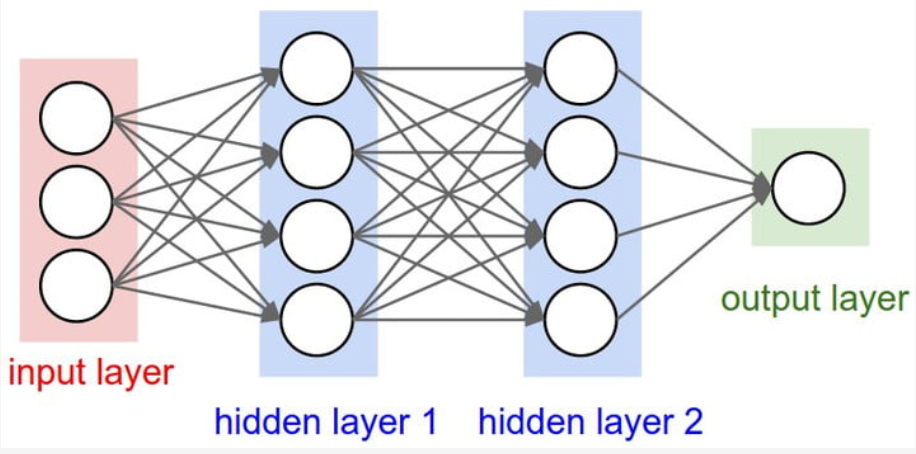

In [51]:
# ANN
show_image(fn='ann.png')

In [58]:
# Artificial Neural Networks (ANN) (pt1)
    # mnist fashion
    # 70k images (28x28)
    # from tensorflow.keras.datasets import fashion_mnist
    
# data
    # downloaded from -- https://www.kaggle.com/zalando-research/fashionmnist/download
test = pd.read_csv('./data/mnist-fashion/fashion-mnist_test.csv')
train = pd.read_csv('./data/mnist-fashion/fashion-mnist_train.csv')
df = pd.concat([test,train])
# split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# pd --> numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
# reshape from (m x n) to (1 x m*n)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


In [68]:
# Artificial Neural Networks (ANN) (pt2)

# model
ann = tf.keras.models.Sequential()
# first layer
    # number of units/neurons: 128
    # activation function: ReLU
    # input_shape(784,)
ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
# dropout
    # speeds up process
    # breaks up co-adaptations, preventing over-fitting and making the network more robust
ann.add(tf.keras.layers.Dropout(0.4))
# additional layers
    # ann.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(784, )))
    # ann.add(tf.keras.layers.Dropout(0.4))
    # ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
    # ann.add(tf.keras.layers.Dropout(0.6))
    # ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
# final layer
    # units: 10 (number of classes in mnist-fashion dataset)
    # activation: 'softmax' (sum of class probabilities is 1)
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))
# compiling the model
    # optimizer: Adam
    # loss: Sparse softmax (categorical) crossentropy
ann.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['sparse_categorical_accuracy']
)
# train
ann.summary()
ann.fit(X_train, y_train, epochs=10)
# evaluate
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

# save model
model_json = ann.to_json()
with open("./models/fashion-mnist-ann-model.json", "w") as json_file:
    json_file.write(model_json)

# save network weights
ann.save_weights("./models/fashion-mnist-ann-model.h5")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 139us/sample - loss: 0.6270 - sparse_categorical_accuracy: 0.7770
Epoch 2/10
42000/42000 [==============================] - 5s 124us/sample - loss: 0.4715 - sparse_categorical_accuracy: 0.8307
Epoch 3/10
42000/42000 [==============================] - 5s 125us/sample - loss: 0.4347 - sparse_ca

8256 157


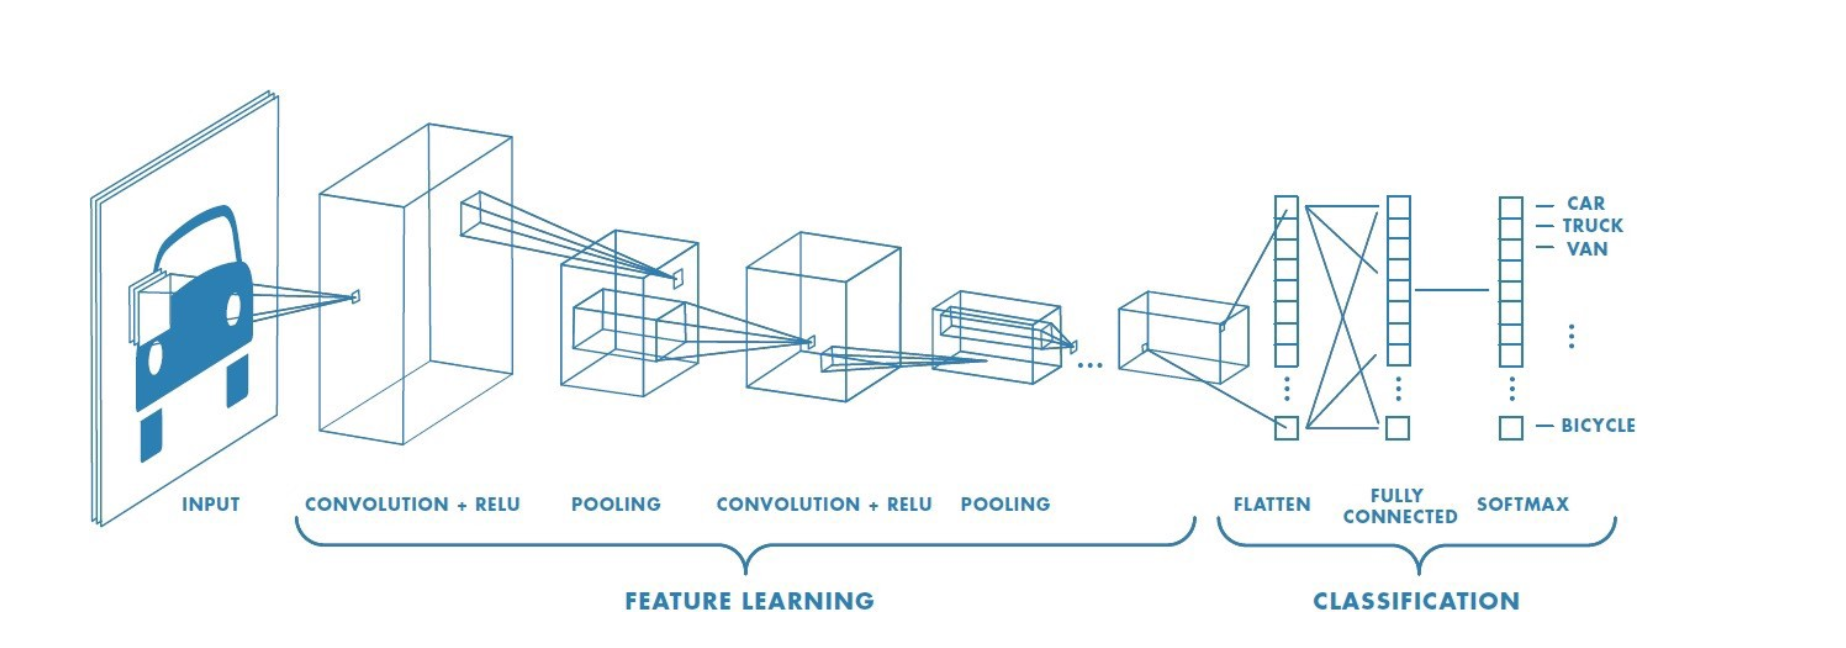

In [75]:
# CNN
show_image(fn='cnn.png')

In [74]:
# Convolutional Neural Networks (CNN)

# cifar10 dataset
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize
X_train = X_train / 255.0
X_test = X_test / 255.0
# model
cnn = tf.keras.models.Sequential()
# CNN layer (1)
    # filters: 32
    # kernel_size: 3
    # padding: same (same -- zeros edge padding, valid -- no zeros edge padding )
    # activation: relu
    # input_shape: (32,32,3)
cnn.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=3, 
    padding="same", 
    activation="relu", 
    input_shape=[32, 32, 3])
)
# CNN layer (2)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
# pool layer (1)
    # pool_size: 2
    # strides: 2
    # padding: valid
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# dropout layer (1)
cnn.add(tf.keras.layers.Dropout(0.4))
# CNN layer (3)
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
# dropout layer (2)
cnn.add(tf.keras.layers.Dropout(0.4))
# CNN layer (4)
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
# pool layer (2)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# flatten layer
cnn.add(tf.keras.layers.Flatten())
# dense layer (1)
    # fully-connected layer
    # units/neurons: 128
    # activaton: relu
    # input_shape not needed (data has been flattened)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# dense layer (2)
    # units/neurons: 10 (number of classes)
    # activation: softmax
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
# summary
cnn.summary()
# compile
cnn.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam", metrics=["sparse_categorical_accuracy"]
)
# train
    # epochs: 5
cnn.fit(X_train, y_train, epochs=5)
# eval
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
# class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# save model
model_json = ann.to_json()
with open("./models/cifar10-cnn-model.json", "w") as json_file:
    json_file.write(model_json)

# save network weights
ann.save_weights("./models/cifar10-cnn-model.h5")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)      

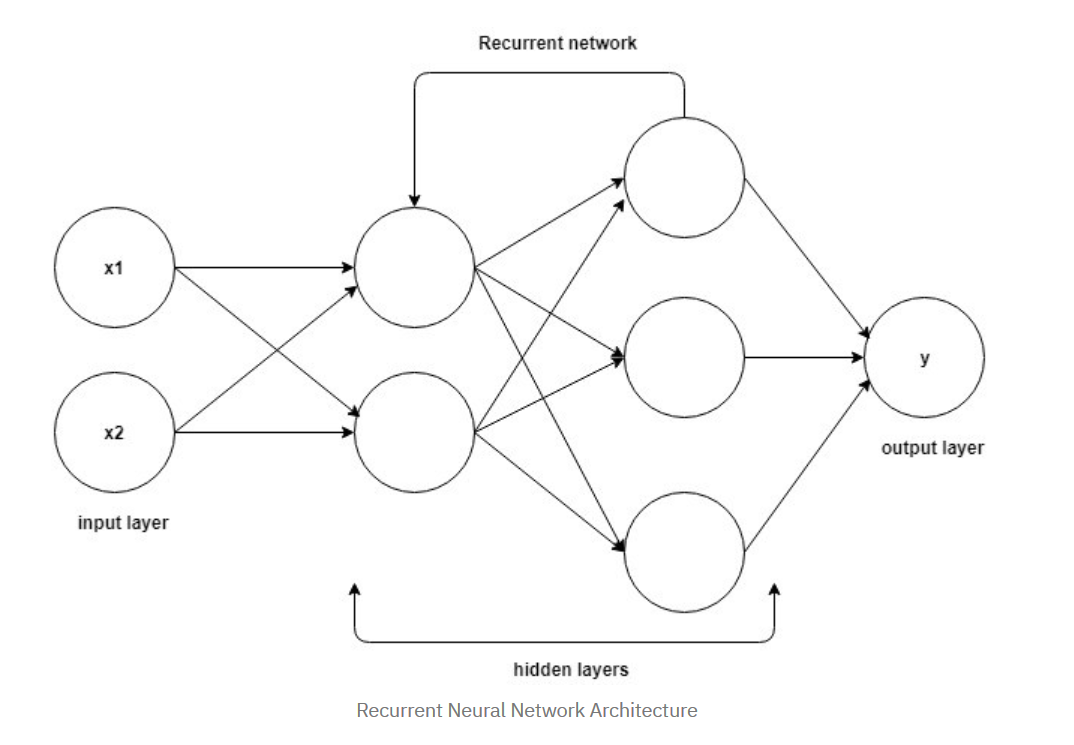

In [52]:
# RNN
show_image(fn='rnn.png')

In [77]:
# Recurrent Neural Networks (RNN)

# data
from tensorflow.keras.datasets import imdb
# dataset
number_of_words = 20000
max_len = 100
vocab_size = number_of_words
embed_size = 128

# split (data is already prepared)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)
# pad sequences to same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
# model
rnn = tf.keras.Sequential()
# embeding layer
rnn.add(tf.keras.layers.Embedding(vocab_size, embed_size, input_shape=(X_train.shape[1],)))
# LSTM layer
    # units: 128
    # activation: tanh
rnn.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
# dense output layer
    # units: 1
    # activation: sigmoid
rnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# compile
rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# summary
rnn.summary()
# train
rnn.fit(X_train, y_train, epochs=3, batch_size=128)
# evaluate
test_loss, test_acurracy = rnn.evaluate(X_test, y_test)

# save model
model_json = ann.to_json()
with open("./models/imdb-rnn-model.json", "w") as json_file:
    json_file.write(model_json)

# save network weights
ann.save_weights("./models/imdb-rnn-model.h5")


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 95s 4ms/sample - loss: 0.4526 - accuracy: 0.7886
Epoch 2/3
25000/25000 [==============================] - 95s 4ms/sample - loss: 0.2872 - accuracy: 0.8863
Epoch 3/3
25000/25000 [==============================] - 81s 3ms/sample - loss: 0.2280 - accuracy: 0.9117
25000/1 [=======================

In [78]:
# transfer learning
    # take a pretrained model
    # keep base model
    # replace head (classification layers)
    
# fine tuning
    # only preserve parts of the base model
    # DO NOT use Fine tuning on the whole network; only a few top layers are enough. 
        # In most cases, they are more specialized. 
    # The goal of the Fine-tuning is to adopt that specific part of the network for our custom (new) dataset.
    # Start with the fine tunning AFTER completion of transfer learning step. 
        # If we try to perform Fine tuning immediately:
        # gradients will be much different between our custom head layer and a few unfrozen layers from the base model.

# techniques
    # large/different dataset -- train the whole model
    # large/similar dataset -- fine tuning
    # small/different dataset -- fine tuning
    # small/similar dataset -- transfer learning
    

In [9]:
# transfer learning

# data
    # https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
data_dir = './data/cats-and-dogs/cats_and_dogs_filtered/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'validation')
# pre-trained model
IMG_SHAPE = (128, 128, 3) # image shape
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE, 
    include_top=False, 
    weights="imagenet"
)
base_model.summary() # summary
base_model.trainable = False # freeze model (no training)
# custom head for network
base_model.output 
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)
# define model
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
model.summary() # model summary
# compile model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)
# data generator
    # Big pre-trained architecture support only certain input sizes.
    # MobileNet supports: (96, 96), (128, 128), (160, 160), (192, 192), (224, 224).
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)
train_generator = data_gen_train.flow_from_directory(
    train_dir, 
    target_size=(128,128), 
    batch_size=128, 
    class_mode="binary"
)
test_generator = data_gen_test.flow_from_directory(
    test_dir, 
    target_size=(128,128), 
    batch_size=128, 
    class_mode="binary"
)
# evaluate transfer learning model
test_loss, test_accuracy = model.evaluate_generator(test_generator)

# fine tuning

# unfreeze few top layers from the model
base_model.trainable = True
print("Number of layers in the base model: {}".format(len(base_model.layers)))
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
# compile model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# fine tune
model.fit_generator(
    train_generator,  
    epochs=5, 
    validation_data=test_generator
)
# evaluate fine tuned model
test_loss, test_accuracy = model.evaluate_generator(test_generator)


# save model
model_json = model.to_json()
with open("./models/catdog-transfer-model.json", "w") as json_file:
    json_file.write(model_json)

# save network weights
model.save_weights("./models/catdog-transfer-model.h5")

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Number of layersin the base model: 155
Epoch 1/5
16/16 [==============================] - 354s 22s/step - loss: 0.2272 - accuracy: 0.8975 - val_loss: 0.1988 - val_accuracy: 0.9330
Epoch 2/5
16/16 [==============================] - 340s 21s/step - loss: 0.0350 - accuracy: 0.9960 - val_loss: 0.2241 - val_accuracy: 0.9330
Epoch 3/5
16/16 [==============================] - 222s 14s/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.2192 - val_accuracy: 0.9410
Epoch 4/5
16/16 [==============================] - 267s 17s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2390 - val_accuracy: 0.9420
Epoch 5/5
16/16 [==============================] - 283s 18s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2109 - val_accuracy: 0.9510


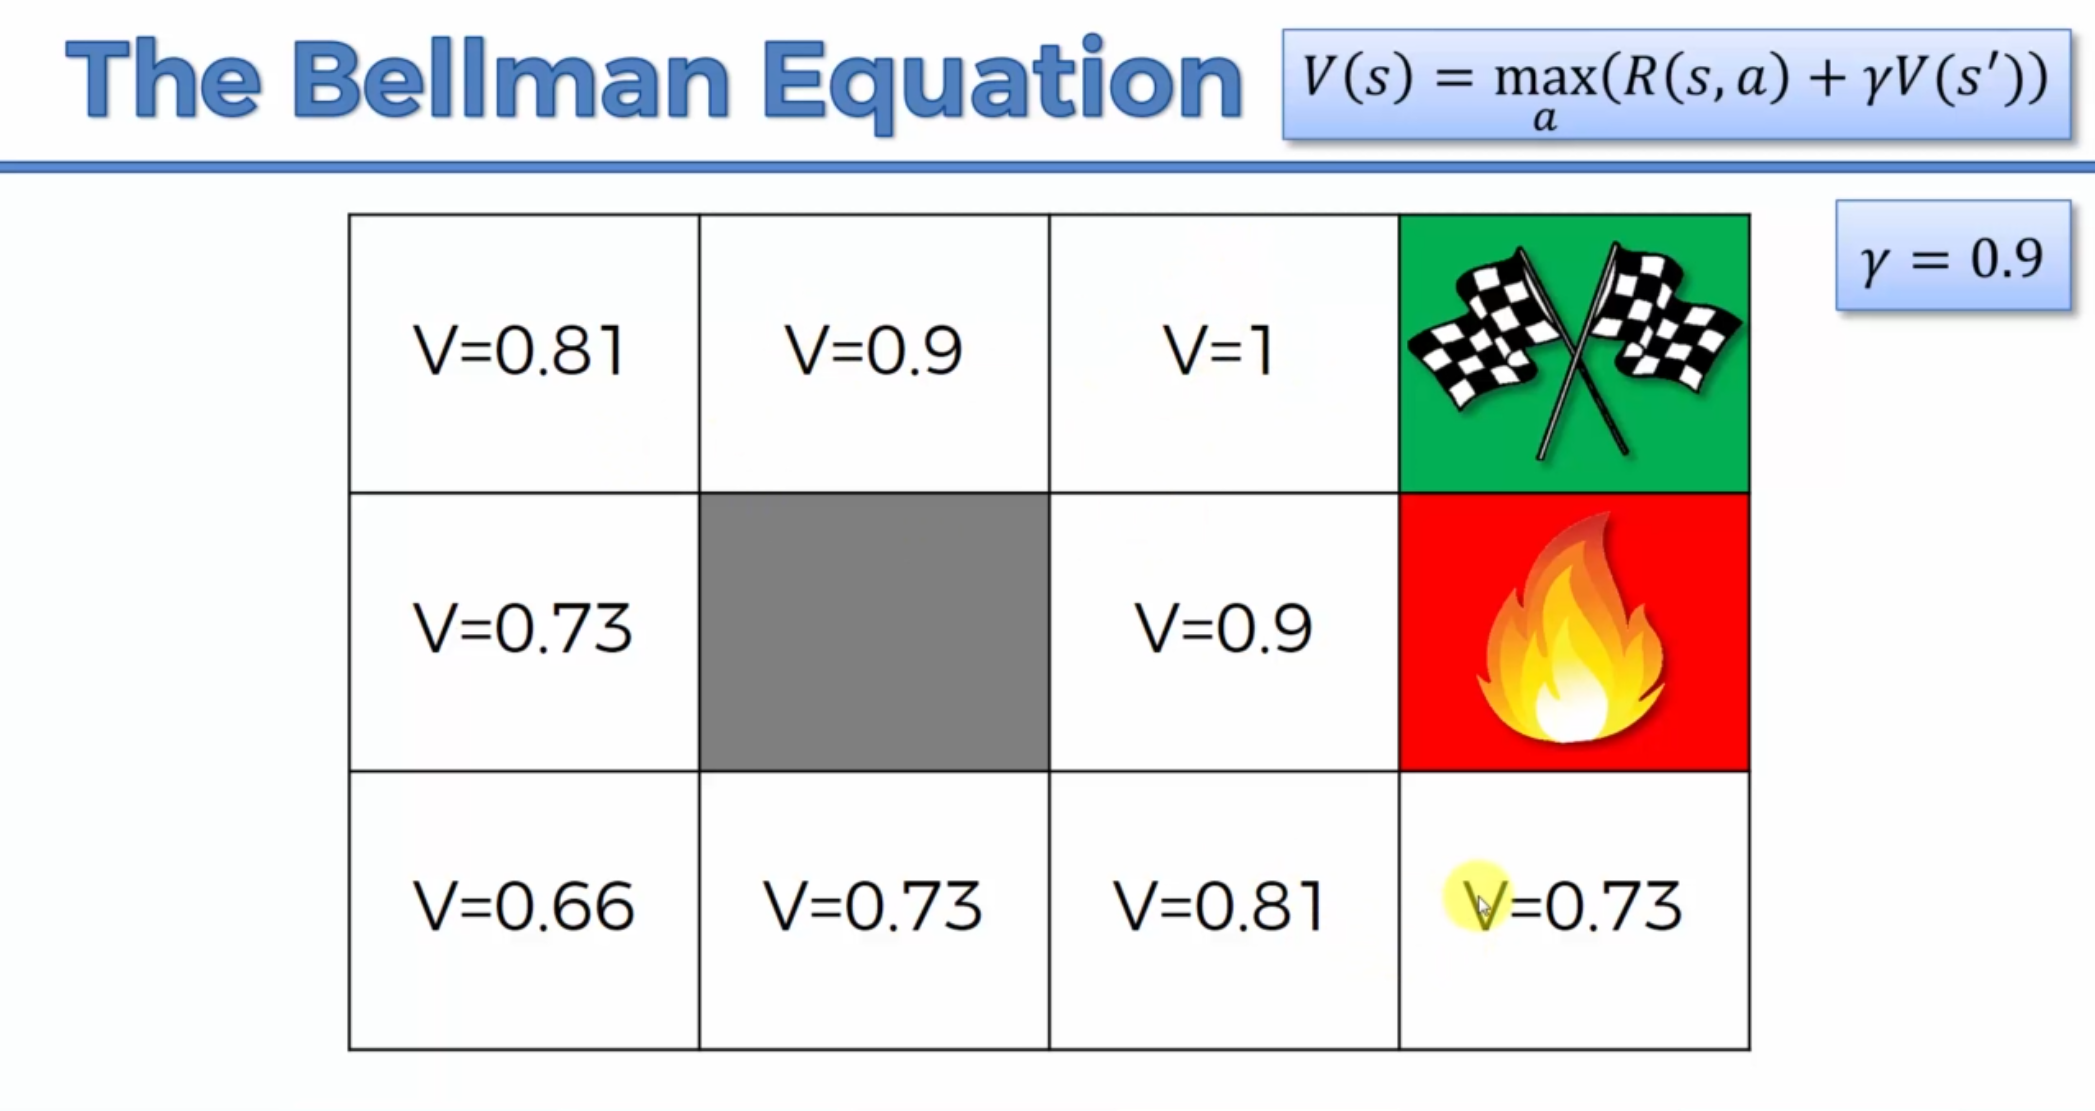

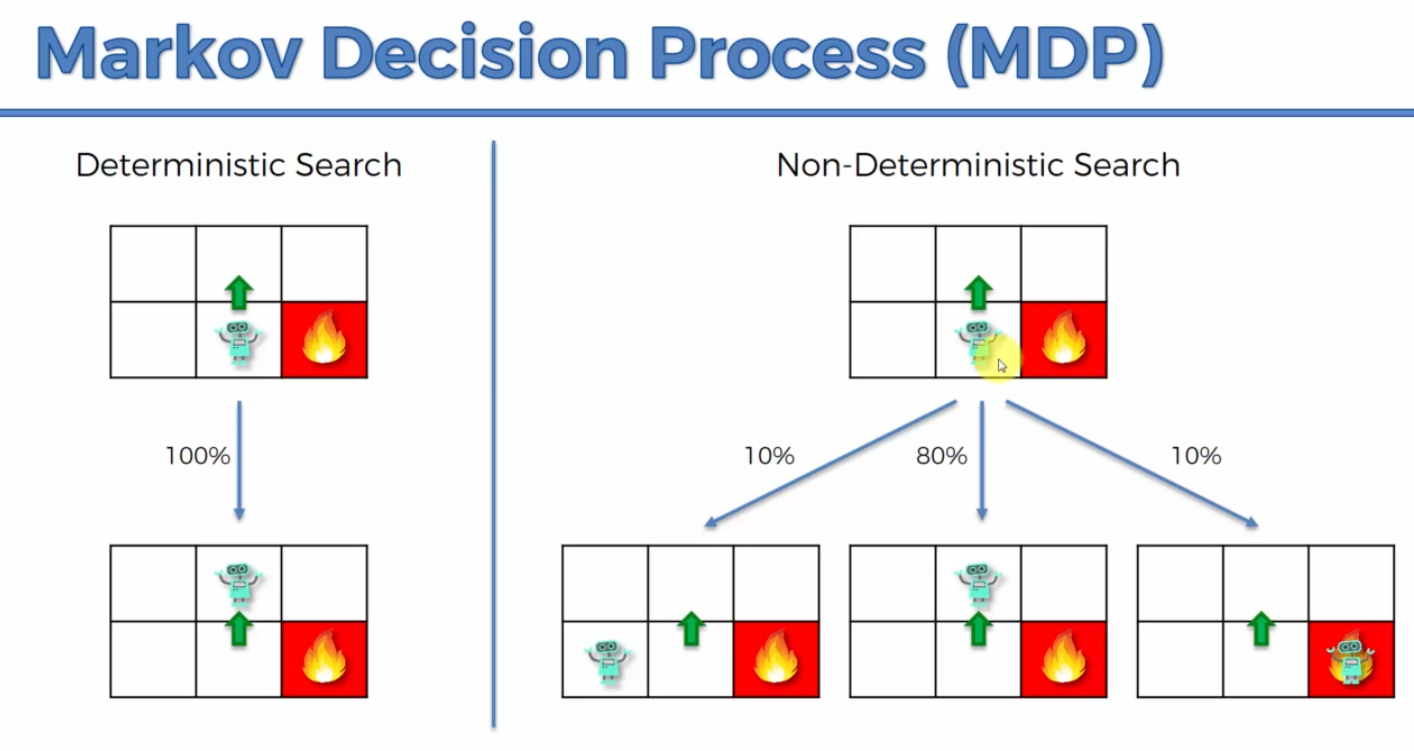

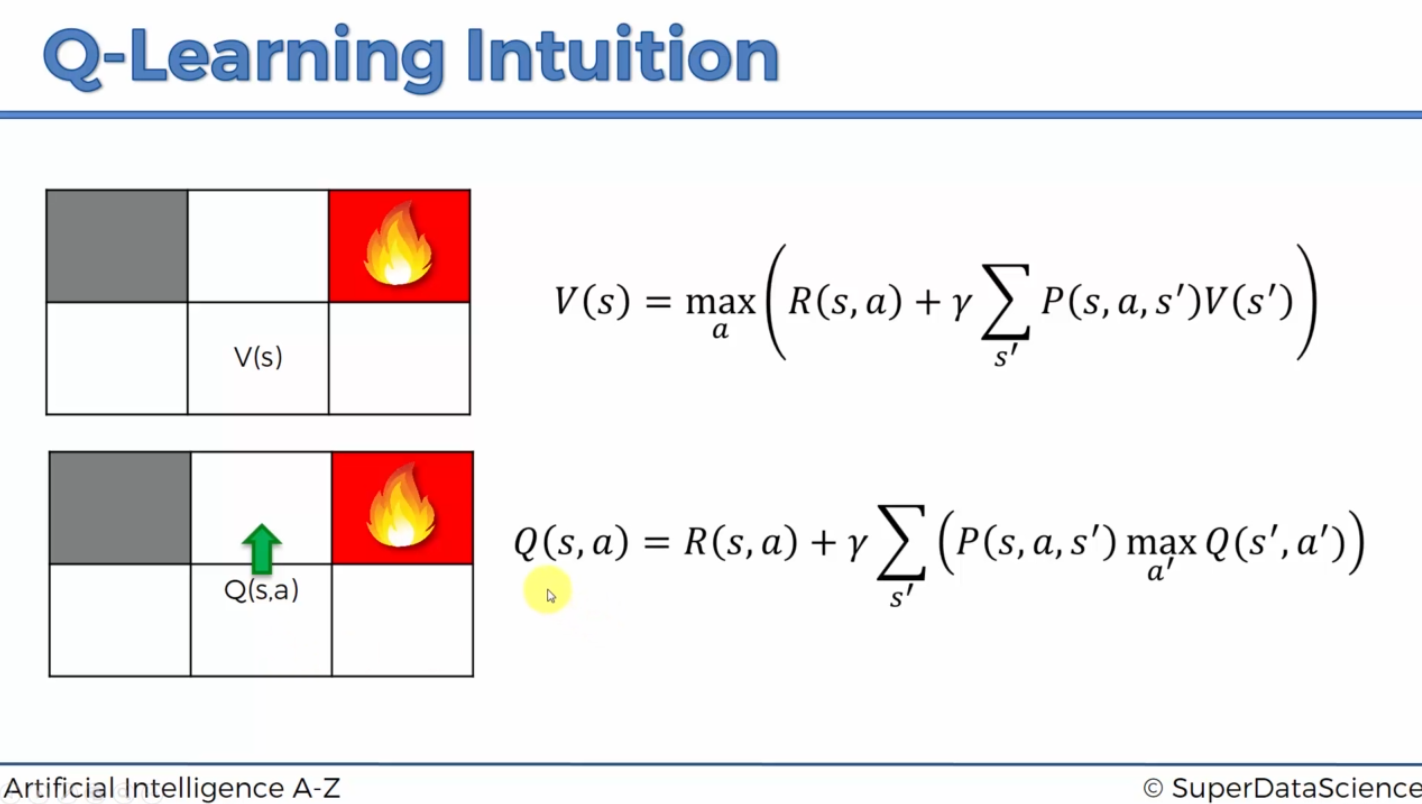

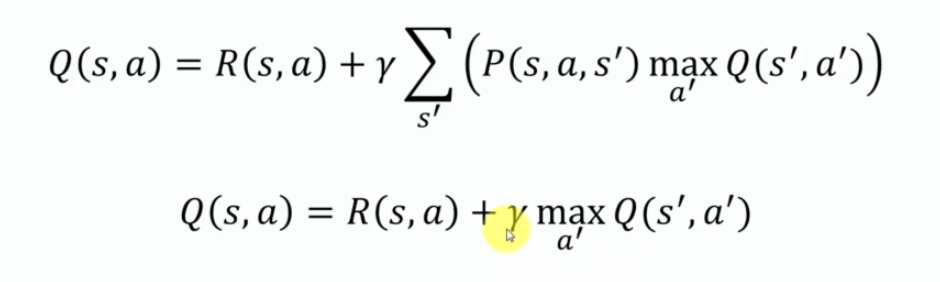

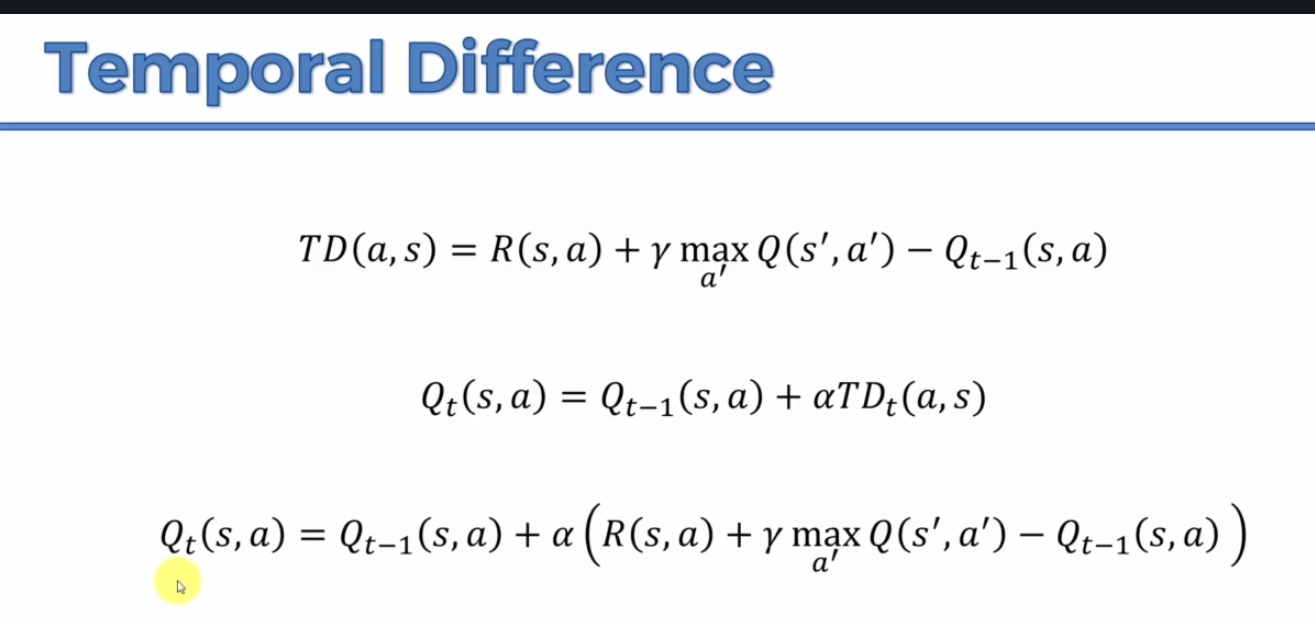

In [4]:
# deep reinforcement learning
    # agent, environment, reward
    
# symbols
    # s -- state
    # a -- action
    # R -- reward
    # gamma -- discount
    # V -- value of state
    # Q -- quality of action
    # alpha -- learning rate
    # TD -- temporal difference

# bellman equation
    # V(s) = max( R(s,a) + gamma*V(s_next))
    # V(s) = max( R(s,a) + gamma * sum( P(s,a,s_next) * V(s_next)) )

# markov decision process (MDP)

# Q learning intuition
    # Q -- quality of actions
    # Q(s,a) = R(s,a) + gamma * sum( P(s,a,s_next) * V(s_next))
    # Q(s,a) = R(s,a) + gamma * sum( P(s,a,s_next) * max( Q(x_next, a_next)) )

# temporal difference

# deep Q-learning
    
    
    
show_image(fn='bellman-equation.png')
show_image(fn='mdp.png')
show_image(fn='q-learning.png')
show_image(fn='temporal-difference1.png')
show_image(fn='temporal-difference2.png')